###Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

###Analysis of Billboard Charts

First, I import the dataset and look to see what metrics are included, how large it is, etc.

In [3]:
charts = pd.read_csv('charts.csv')
charts.tail(5)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
327382,2021-05-01,96,Go!,Moneybagg Yo Featuring BIG30,NaN,96,1
327383,2021-05-01,97,Drankin N Smokin,Future & Lil Uzi Vert,NaN,31,12
327384,2021-05-01,98,Monsters,All Time Low Featuring Demi Lovato & blackbear,95.0,55,17
327385,2021-05-01,99,Slatty,Young Thug & Gunna Featuring Yak Gotti & Lil Duke,NaN,99,1
327386,2021-05-01,100,4 Da Gang,42 Dugg & Roddy Ricch,84.0,67,3


My first question was: How long do number one songs usually stay on the board?





In [12]:
one = charts[charts['rank'] == 1]
one_length = one.groupby('artist')['weeks-on-board'].mean()
one_length.mean()

10.554077378429051

**The average number of weeks a number one song stayed on the board was approximately 10.55**

My next question was: Which songs stayed at number one the longest?

In [5]:
lengthy = charts[charts['weeks-on-board'] > 75]
lengthy

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
267034,2009-10-10,48,I'm Yours,Jason Mraz,49.0,6,76
289809,2014-02-22,23,Radioactive,Imagine Dragons,13.0,3,76
289912,2014-03-01,26,Radioactive,Imagine Dragons,23.0,3,77
289926,2014-03-01,40,Sail,AWOLNATION,41.0,17,76
290013,2014-03-08,27,Radioactive,Imagine Dragons,26.0,3,78
290027,2014-03-08,41,Sail,AWOLNATION,40.0,17,77
290113,2014-03-15,27,Radioactive,Imagine Dragons,27.0,3,79
290127,2014-03-15,41,Sail,AWOLNATION,41.0,17,78
290217,2014-03-22,31,Radioactive,Imagine Dragons,27.0,3,80
290231,2014-03-22,45,Sail,AWOLNATION,41.0,17,79


**I'm Yours, Radioactive, and Sail were the only 3 songs to stay on the charts longer than 75 weeks**

My next question was: How long have this week's 10 most popular song been on the chart?

In [6]:
this_week = charts[charts['date'] == '2021-05-01']
this_week = this_week.nsmallest(10, 'rank')

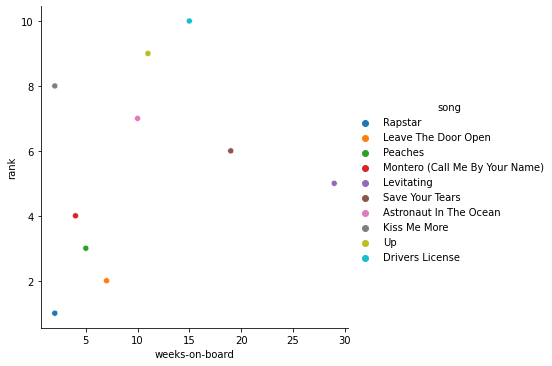

In [7]:
sns.relplot(x="weeks-on-board", y="rank", hue='song', data=this_week)

###Beyonce's Billboard Data

This is where I decided to focus on Beyoncé more specifically. My first question was: How did her top 10 hits perform over time? (In this context top 10 means songs that were ranked 1-10 on the Billboard chart, not her 10 most popular songs)

In [13]:
beyonce = charts[charts['artist'] == 'Beyonce']
beyonce10 = beyonce[beyonce['rank'] < 11]

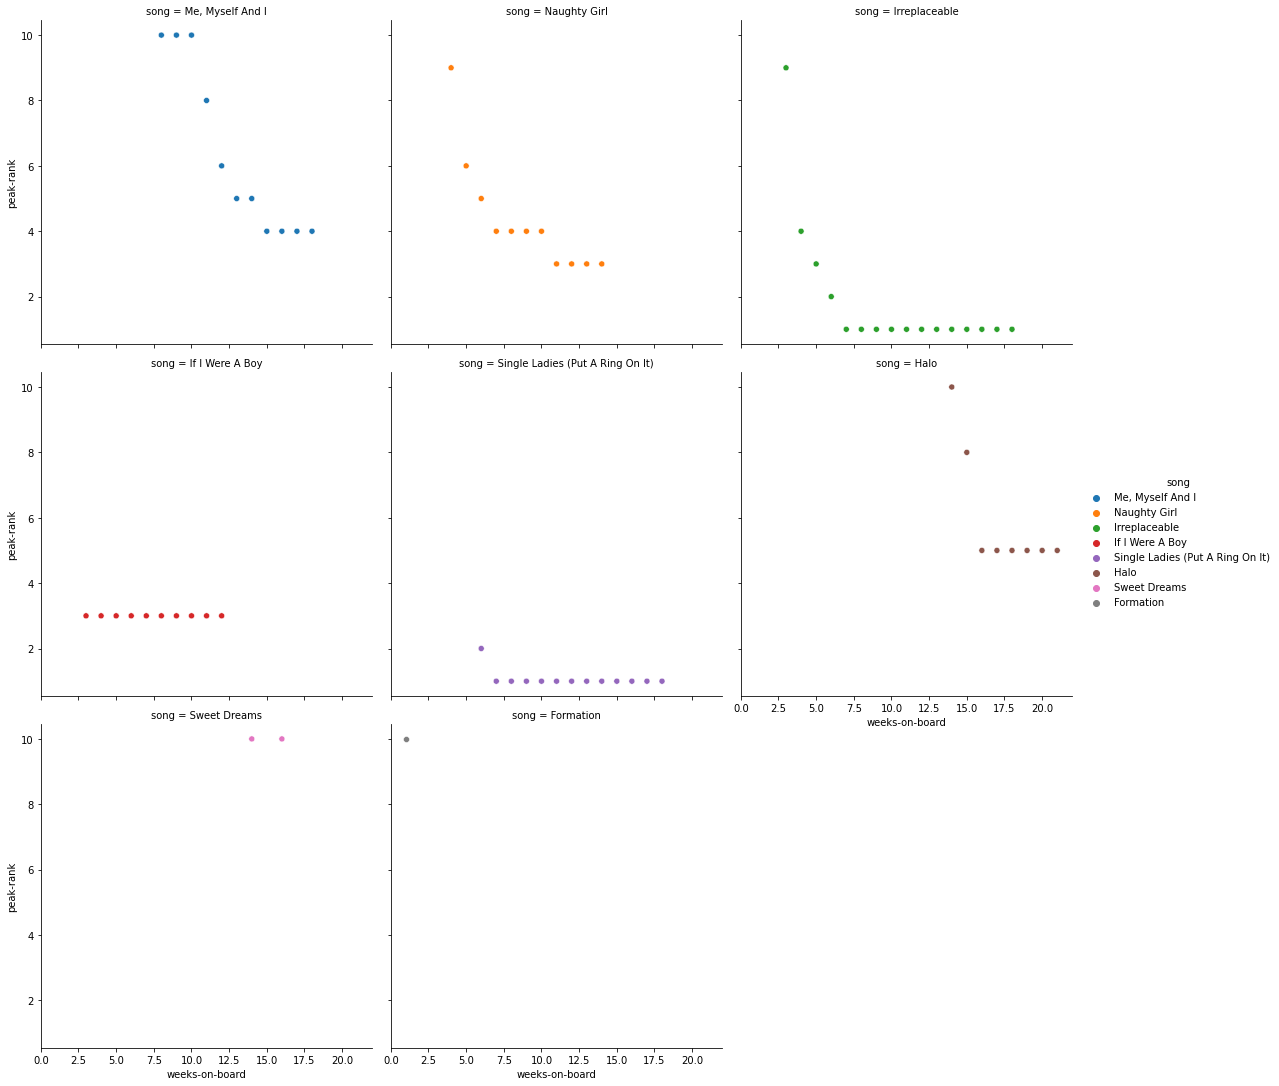

In [10]:
sns.relplot(x="weeks-on-board", y="peak-rank", hue='song', col='song', col_wrap=3, data=beyonce10)

This next chart continues looking at the same question, but with a violin plot so as to better represent the time spent by a certain song at a certain rank.

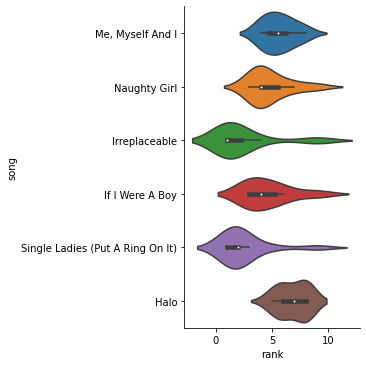

In [11]:
beyonce9 = beyonce[beyonce['rank'] < 10]
sns.catplot(x="rank", y="song", kind="violin", data=beyonce9)

My next question was: Which of Beyoncé's top 10 hits performed the best overall?

In [ ]:
beyonce10.groupby('song')['rank'].mean()

song
Formation                           10.000000
Halo                                 7.625000
If I Were A Boy                      5.700000
Irreplaceable                        2.437500
Me, Myself And I                     6.818182
Naughty Girl                         4.818182
Single Ladies (Put A Ring On It)     2.538462
Sweet Dreams                        10.000000
Name: rank, dtype: float64

**'Irreplaceable' had the highest average rank, at approximately 2.44**

How did 'Irreplaceable' perform during its time on the Hot 100 chart?

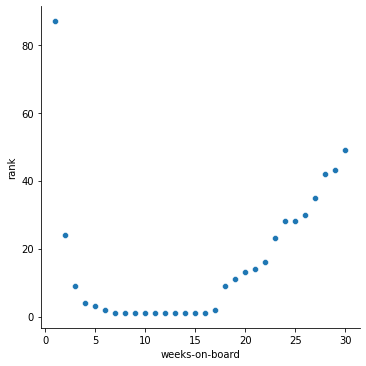

In [ ]:
irreplaceable = beyonce[beyonce['song'] == 'Irreplaceable']
sns.relplot(x="weeks-on-board", y="rank", data=irreplaceable)

###Beyonce's Award Data

First, I import this dataset and look to see what metrics are included, how large it is, etc.

In [ ]:
awards = pd.read_csv('Beyonce - Awards.csv')
awards.head(5)

,Song Title /Album Title,Year,Award Institution,Award Category,Award Type,International Award,Result
0,Beyonce,2003,American Music Award,Favorite Soul/R&B Female Artist,Gender & Race,NaN,Nominated
1,Beyonce,2003,American Music Award,Fan's Choice Award,NaN,NaN,Nominated
2,*Dangerously in Love*,2003,American Music Award,Favorite Soul/R&B Album,Race,NaN,Nominated
3,Beyonce,2004,American Music Award,Favorite Soul/R&B Female Artist,Gender & Race,NaN,Nominated
4,Beyonce,2006,American Music Award,Artist of the Year,NaN,NaN,Nominated


I narrowed the dataset to show me only the awards 'Irreplaceable' was nominated for.

In [ ]:
irreplaceable_awards = awards[awards['Song Title /Album Title'] == 'Irreplaceable']
irreplaceable_awards

,Song Title /Album Title,Year,Award Institution,Award Category,Award Type,International Award,Result
38,Irreplaceable,2008,ASCAP Pop Music Awards,Most Performed Songs,NaN,NaN,Won
44,Irreplaceable,2007,ASCAP PRS Awards,Most Performed Songs,NaN,NaN,Won
60,Irreplaceable,2008,ASCAP Rhythm & Soul Music Awards,Award Winning R&B/Hip-Hop Songs,Race,NaN,Won
93,Irreplaceable,2007,BET Awards,Video of the Year,NaN,NaN,Won
94,Irreplaceable,2007,BET Awards,Viewers Choice Award,NaN,NaN,Nominated
298,Irreplaceable,2008,Grammy Awards,Record of the Year,NaN,NaN,Nominated
412,Irreplaceable,2007,MTV Video Music Awards,Video of the Year,Video,NaN,Nominated
481,Irreplaceable,2007,NAACP Image Awards,Outstanding Song,NaN,NaN,Nominated
482,Irreplaceable,2007,NAACP Image Awards,Outstanding Music Video,Video,NaN,Nominated
521,Irreplaceable,2007,Nickelodeon Kids' Choice Awards,Favorite Song,NaN,NaN,Won


How many of the awards it was nominated for did 'Irreplaceable' win?

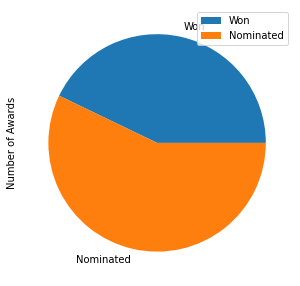

In [ ]:
award_pie = pd.DataFrame({'Number of Awards': [6, 8]},
                  index=['Won', 'Nominated'])
plot = award_pie.plot.pie(y='Number of Awards', figsize=(5, 5))